In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#데이터를 5개만 불러와서 살펴보겠습니다.

df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#몇개의 행과 열로 이루어져있는지 살펴보겠습니다.

print(df.shape)

(891, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#이름은 필요없으므로 삭제하겠습니다.

df = df.drop('Name', axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#결손 데이터 확인

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# age는 평균값으로 cabin는 c000으로 embarked는 c로 대체하여 진행해보겠습니다.

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('C000')
df['Embarked'] = df['Embarked'].fillna('C')

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
# 나이가 장황하게 퍼져있어 수정하겠습니다.

df['Age'] = df['Age'].apply(lambda x : 'child' if x <= 15 else('adult' if x <= 60 else 'elderly'))
df['Age'].value_counts()

adult      786
child       83
elderly     22
Name: Age, dtype: int64

In [10]:
df.head()

#값들이 생각보다 안정적으로 변했습니다.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,adult,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,female,adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,adult,0,0,STON/O2. 3101282,7.9250,C000,S
3,4,1,1,female,adult,1,0,113803,53.1000,C123,S
4,5,0,3,male,adult,0,0,373450,8.0500,C000,S


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

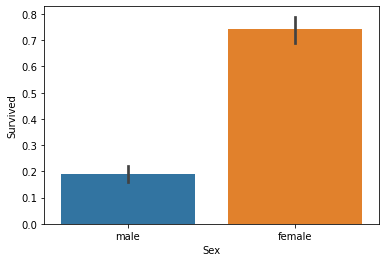

In [11]:
# 타이타닉 생존자를 시각화 해보겠습니다.

import seaborn as sns
sns.barplot(x = "Sex", y = 'Survived', data = df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

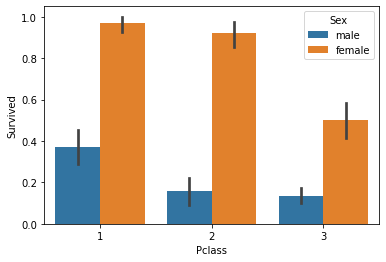

In [12]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

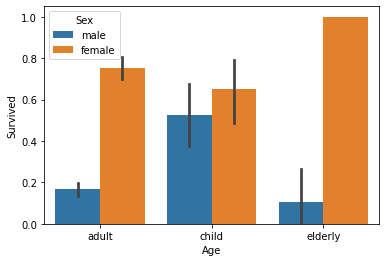

In [13]:
# 이번에는 나이로 봐보겠습니다.

sns.barplot(x = 'Age', y = 'Survived', hue = 'Sex', data = df)

#여성들을 생존 확률이 가장 높은걸 볼 수 있습니다.(sex, age, pclass등이 생존을 좌우하는 피처인게 확인 가능합니다.)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

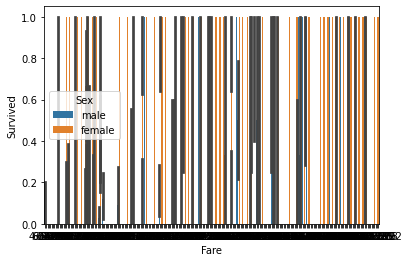

In [14]:
sns.barplot(x = 'Fare', y = 'Survived', hue = 'Sex', data = df)

<AxesSubplot:xlabel='Survived'>

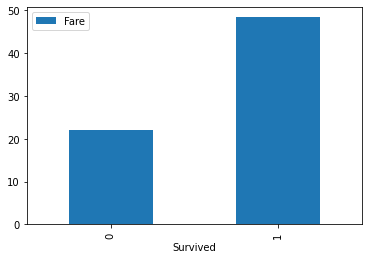

In [25]:
#fare에 값이 너무 많길래 평균을 구하여 확인해보겠습니다.

df.groupby(['Survived']).mean().plot.bar(y = 'Fare')

#티켓 값도 생존에 영향을 미친다는걸 확인할수있습니다.